In [6]:
from pyscf import gto, scf
#import os
import numpy as np
from matplotlib import pyplot as plt

d1 = 5
atom1 = f'''
H 0 0 0
H {d1} 0 0
'''

mol1 = gto.Mole(
verbose=3,
atom=atom1,
basis='crenbl',
)

mol1.build()
mf1 = scf.RHF(mol1).density_fit()
mf1.kernel()

d2 = 6
atom2 = f'''
H 0 0 0
H {d2} 0 0
'''

mol2 = gto.Mole(
verbose=3,
atom=atom2,
basis='crenbl',
)

mol2.build()
mf2 = scf.RHF(mol2).density_fit()
mf2.kernel()

print('the rhf energy difference is: ',mf1.e_tot-mf2.e_tot)


WARN: Even tempered Gaussians are generated as DF auxbasis for  H

converged SCF energy = -0.763182266704983

WARN: Even tempered Gaussians are generated as DF auxbasis for  H

converged SCF energy = -0.752803643071971
the rhf energy difference is:  -0.010378623633011785


In [3]:
from ad_afqmc.corr_sample_test import corr_sample
from ad_afqmc import pyscf_interface

In [8]:
options = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
    "free_proj": False,
}

# options2 = {
#     "dt": 0.005,
#     "n_eql": 4,
#     "n_ene_blocks": 1,
#     "n_sr_blocks": 10,
#     "n_blocks": 200,
#     "n_walkers": 50,
#     "seed": 2,
#     "walker_type": "rhf",
#     "trial": "rhf",
# }

In [9]:
import pickle
with open("options.pkl", "wb") as file:
    pickle.dump(options, file)

In [10]:
with open("options.pkl", "rb") as file:
    options = pickle.load(file)

print(options["free_proj"]) 

False


In [8]:
from jax import random
import jax
seeds = random.randint(random.PRNGKey(98),
                        shape=(10,), minval=0, maxval=100000)
print(seeds)

prop_data_key = jax.random.PRNGKey(seeds[0])
# prop_data_key = random.randint(random.PRNGKey(seeds[0]),
#                         shape=(2,), minval=0, maxval=100000)
print(prop_data_key)
prop_data_key, subkey2 = random.split(prop_data_key)
print(prop_data_key,subkey2)

[ 5550 81205 43177 48119 58886 35486 48871 27135 29143 63114]
[   0 5550]
[ 830082274 1285499985] [3302481531 4246221579]


In [ ]:
from ad_afqmc import mpi_jax
mo_file1="h2_mo1.npz"
chol_file1="h2_chol1"
mo_file2="h2_mo2.npz"
chol_file2="h2_chol2"
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options,mo_file=mo_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options,mo_file=mo_file2,chol_file=chol_file2)
prop_data1_init, ham_data1_init = \
    corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, 2, MPI)
prop_data2_init, ham_data2_init = \
    corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, 98, MPI)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_exp_terms: 6
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_exp_terms: 6
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#


In [13]:
print(ham_data1["h0"])

0.10583544218400001


In [4]:
mo_file1="h2_mo1.npz"
chol_file1="h2_chol1"
corr_sample.fix_len_chol_prep(mf1,chol_len=17,chol_cut=1e-10,mo_file=mo_file1,chol_file=chol_file1)
mo_file2="h2_mo2.npz"
chol_file2="h2_chol2"
corr_sample.fix_len_chol_prep(mf2,chol_len=17,chol_cut=1e-10,mo_file=mo_file2,chol_file=chol_file2)

# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 17
#
# Calculating Cholesky integrals
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 17
#


In [3]:
mo_file1="h2_mo1.npz"
chol_file1="h2_chol1"
pyscf_interface.prep_afqmc(mf1,mo_file=mo_file1,chol_file=chol_file1)
mo_file2="h2_mo2.npz"
chol_file2="h2_chol2"
pyscf_interface.prep_afqmc(mf2,mo_file=mo_file2,chol_file=chol_file2)

#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Decomposing ERI with DF
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 14
#
#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Decomposing ERI with DF
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 8
# Number of Cholesky vectors: 14
#


In [5]:
options1 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
}

options2 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 2,
    "walker_type": "rhf",
    "trial": "rhf",
}

In [10]:
afqmc1 = (mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1))
e_afqmc1, err_afqmc1 = driver.afqmc(*afqmc1)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -7.631814297e-01     1.36e+00 
#     1      -8.596905470e-01     3.73e+00 
#     2      -8.500128984e-01     5.53e+00 
#     3      -8.647252321e-01     5.94e+00 
#     4      -9.272673726e-01     6.34e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -8.658989072e-01                -              7.66e+00 
    20      -8.777760173e-01        1.128268909e-02        9.39e+00 
    40      -8.778325108e-01        6.011873039e-03        1.11e+01 
    60      -8.815155674e-01        5

In [11]:
afqmc2 = (mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2))
e_afqmc2, err_afqmc2 = driver.afqmc(*afqmc2)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -7.528035315e-01     2.35e-01 
#     1      -8.710969090e-01     6.68e-01 
#     2      -8.736531734e-01     1.10e+00 
#     3      -8.765730858e-01     1.52e+00 
#     4      -8.522193432e-01     1.93e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -8.340724111e-01                -              2.01e+00 
    20      -8.732925812e-01        1.405603993e-02        3.70e+00 
    40      -8.737021831e-01        6.303080598e-03        5.40e+00 
    60      -8.748937663e-01        4.

In [12]:
afqmc_en_diff = e_afqmc1 - e_afqmc2
afqmc_en_diff_err = np.sqrt(err_afqmc1**2+err_afqmc2**2)
print(f'the afqmc energy difference is {afqmc_en_diff}, error is {afqmc_en_diff_err}')

the afqmc energy difference is -0.0054958860866555215, error is 0.004066496443225998


In [46]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

seed1 = 98
seed2 = 2
prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, seed1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, seed2, MPI)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01


In [21]:
from ad_afqmc import mpi_jax
ham_data1, ham1, prop1, trial1, wave_data1, _, _, options1, MPI \
= mpi_jax._prep_afqmc(options1,mo_file=mo_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, _, _, options2, MPI \
= mpi_jax._prep_afqmc(options2,mo_file=mo_file2,chol_file=chol_file2)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#


In [6]:
import jax
from jax import numpy as jnp

In [8]:
key = jax.random.PRNGKey(98)
seeds = jax.random.randint(key, (10,), minval=0, maxval=10000)
#seeds = jnp.array([98,2])

en1,en2,en_diff = corr_sample.scan_seeds_cs(seeds,5,
               ham_data1, ham1, prop1, trial1, wave_data1,
               ham_data2, ham2, prop2, trial2, wave_data2, 
               MPI)
print(en1)
print(en2)
print(en_diff)

[-0.83234035 -0.85803101 -0.83054534 -0.87387377 -0.807604   -0.83821377
 -0.85713624 -0.84452974 -0.79958895 -0.85167963]
[-0.82576028 -0.85319467 -0.82436512 -0.86932527 -0.7998491  -0.833293
 -0.85625232 -0.83898082 -0.79133331 -0.84643937]
[-0.00658007 -0.00483634 -0.00618023 -0.0045485  -0.00775489 -0.00492078
 -0.00088391 -0.00554892 -0.00825564 -0.00524026]


In [31]:
prop_data1, ham_data1 = \
    corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, 2, MPI)
prop_data2, ham_data2 = \
    corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, 98, MPI)

In [32]:
(prop_data1,prop_data2) = corr_sample.cs_steps_scan(5,
                                prop_data1,ham_data1,prop1,trial1,wave_data1,
                                prop_data2,ham_data2,prop2,trial2,wave_data2)
en_samples1 = corr_sample.en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
en_samples2 = corr_sample.en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_en_sample1 = en_samples1*norm_weight1
weight_en_sample2 = en_samples2*norm_weight2
weight_en_diff_sample = weight_en_sample1 - weight_en_sample2
en1 = sum(weight_en_sample1)
en2 = sum(weight_en_sample2)
en_diff = sum(weight_en_diff_sample)

print(en1,en2,en_diff)

-0.8163628459835685 -0.8088692894647822 -0.007493556518785676


In [16]:
seed = options1["seed"]
prop_data1_init, ham_data1_init = \
    corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, seed, MPI)
prop_data2_init, ham_data2_init = \
    corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, seed, MPI)

comm = MPI.COMM_WORLD
rank = comm.Get_rank()


def _seed_cs(carry,seed):
    prop_data1_init["key"] = jax.random.PRNGKey(seed + rank)
    cs_prop_data = corr_sample.cs_steps_scan(6,
                                prop_data1_init,ham_data1_init,prop1,trial1,wave_data1,
                                prop_data2_init,ham_data2_init,prop2,trial2,wave_data2)
    #cs_prop_data = seed_cs_steps_scan(seed)
    (prop_data1,prop_data2) = cs_prop_data
    loc_en_samples1 = corr_sample.en_samples(prop_data1,ham_data1_init,prop1,trial1,wave_data1)
    loc_en_samples2 = corr_sample.en_samples(prop_data2,ham_data2_init,prop2,trial2,wave_data2)
    loc_weight_sample1 = prop_data1["weights"]
    loc_weight1 = jnp.sum(loc_weight_sample1)
    loc_weight_sample2 = prop_data2["weights"]
    loc_weight2 = jnp.sum(loc_weight_sample2)
    loc_en_sample1 = loc_en_samples1*loc_weight_sample1
    loc_en_sample2 = loc_en_samples2*loc_weight_sample2
    #weight_en_diff_sample = weight_en_sample1 - weight_en_sample2
    loc_en1 = sum(loc_en_sample1) #not normalized
    loc_en2 = sum(loc_en_sample2) #not normalized
    #en_diff = sum(weight_en_diff_sample)
    return carry, (loc_en1,loc_weight1,loc_en2,loc_weight2)

_,(loc_en1,loc_weight1,loc_en2,loc_weight2) = _seed_cs(carry=None,seed=98)

In [17]:
print(loc_en1,loc_weight1,loc_en2,loc_weight2)
print(loc_en1/loc_weight1,loc_en2/loc_weight2)
print(loc_en1/loc_weight1-loc_en2/loc_weight2)

-42.21006987766604 50.19739153324911 -41.91487525026485 50.20894335603793
-0.8408817388391081 -0.8348089493348068
-0.006072789504301346


In [39]:
seed = options1["seed"]
prop_data1_init, ham_data1_init = \
    corr_sample.init_prop(ham_data1, ham1, prop1, trial1, wave_data1, seed, MPI)
prop_data2_init, ham_data2_init = \
    corr_sample.init_prop(ham_data2, ham2, prop2, trial2, wave_data2, seed, MPI)

def scan_seeds(seeds,eq_steps,
               prop_data1_init,ham_data1_init,prop1,trial1,wave_data1,
               prop_data2_init,ham_data2_init,prop2,trial2,wave_data2, 
               MPI):    

    comm = MPI.COMM_WORLD
    rank = comm.Get_rank()


    def _seed_cs(carry,seed):
        prop_data1_init["key"] = jax.random.PRNGKey(seed + rank)
        (prop_data1,prop_data2) = corr_sample.cs_steps_scan(eq_steps,
                                    prop_data1_init,ham_data1_init,prop1,trial1,wave_data1,
                                    prop_data2_init,ham_data2_init,prop2,trial2,wave_data2)
        #(prop_data1,prop_data2) = cs_prop_data
        loc_en_samples1 = corr_sample.en_samples(prop_data1,ham_data1_init,prop1,trial1,wave_data1)
        loc_en_samples2 = corr_sample.en_samples(prop_data2,ham_data2_init,prop2,trial2,wave_data2)
        loc_weight_sample1 = prop_data1["weights"]
        loc_weight1 = jnp.sum(loc_weight_sample1)
        loc_weight_sample2 = prop_data2["weights"]
        loc_weight2 = jnp.sum(loc_weight_sample2)
        loc_en_sample1 = loc_en_samples1*loc_weight_sample1
        loc_en_sample2 = loc_en_samples2*loc_weight_sample2
        loc_en1 = sum(loc_en_sample1) #not normalized
        loc_en2 = sum(loc_en_sample2) #not normalized
        return carry, (loc_en1,loc_weight1,loc_en2,loc_weight2)
    
    _, (loc_en1,loc_weight1,loc_en2,loc_weight2) = jax.lax.scan(_seed_cs, None, seeds)

    return loc_en1,loc_weight1,loc_en2,loc_weight2

In [43]:
key = jax.random.PRNGKey(98)
seeds = jax.random.randint(key, (5,), minval=0, maxval=10000)
print(seeds)

[5694 1719 5711 8695 7050]


In [40]:
seeds = jnp.array([98,2])

In [45]:
loc_en1,loc_weight1,loc_en2,loc_weight2 = scan_seeds(seeds,6,
               prop_data1_init,ham_data1_init,prop1,trial1,wave_data1,
               prop_data2_init,ham_data2_init,prop2,trial2,wave_data2, 
               MPI)
print(loc_en1)
print(loc_weight1)
print(loc_en1/loc_weight1)
print(loc_en2)
print(loc_weight2)
print(loc_en2/loc_weight2)
print(loc_en1/loc_weight1-loc_en2/loc_weight2)

[-43.80483109 -41.6811084  -41.1397114  -42.73883566 -42.09151105]
[50.33680763 50.07097536 50.1142274  50.16592206 50.1354802 ]
[-0.87023459 -0.83244051 -0.8209188  -0.85194957 -0.83955536]
[-43.42071589 -41.43067347 -40.79543712 -42.46866136 -41.81089983]
[50.33699008 50.07909721 50.1235836  50.17563229 50.14620735]
[-0.86260056 -0.82730472 -0.81389706 -0.84640012 -0.8337799 ]
[-0.00763403 -0.00513579 -0.00702174 -0.00554945 -0.00577546]


In [29]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

seed = 98
cs_prop_data = seed_cs_steps_scan(seed)
(prop_data1,prop_data2) = cs_prop_data
en_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
en_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_en_sample1 = en_samples1*norm_weight1
weight_en_sample2 = en_samples2*norm_weight2
weight_en_diff_sample = weight_en_sample1 - weight_en_sample2
en1 = sum(weight_en_sample1)
en2 = sum(weight_en_sample2)
en_diff = sum(weight_en_diff_sample)
print(en1,en2,en_diff)

# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01
-0.8163628459853526 -0.8088692894703093 -0.0074935565150432756


In [ ]:
-0.8283176339161061 -0.8213239098281045 -0.006993724088001368
-0.8340312686792748 -0.8283572026560176 -0.005674066023256789
-0.8163628459853526 -0.8088692894703093 -0.0074935565150432756

[-0.80537366]


In [92]:
seeds = [98,2]
seed1 = seeds[0]
seed2 = seeds[1]
options1["seed"] = seed1
options2["seed"] = seed2
prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)


# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01


In [ ]:
eql_steps = 5
n_runs = 2
cs_prop_data = (prop_data1,prop_data2)
#seeds1 = random.randint(random.PRNGKey(options1["seed"]), shape=(n_runs,), minval=0, maxval=1000)
#seeds2 = random.randint(random.PRNGKey(options2["seed"]), shape=(n_runs,), minval=0, maxval=1000)
#seeds = jnp.vstack((seeds1,seeds2)).T

seeds = [98,2]

def cs_steps_eql(seeds):
    '''return the last element at a desired num of eql steps'''
    seed1 = seeds[0]
    seed2 = seeds[1]
    options1["seed"] = seed1
    options2["seed"] = seed2
    prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
    prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

    cs_prop_data,(en1,en2,en_diff) = cs_steps_scan(
        eql_steps,prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    return (cs_prop_data[-1],en1[-1],en2[-1],en_diff[-1])

(_,en1_eql,en2_eql,en_diff_eql) = cs_steps_eql(seeds,ham_data1,ham_data2)
#_,(_,en1_eql,en2_eql,en_diff_eql) = jax.lax.scan(cs_steps_eql,None,seeds)
    

# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01


In [56]:
prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
cwalker_en_diff = [0]*len(steps)
weight_cwalker_en_diff_err = [0]*len(steps)
for n in steps:
    prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    en_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    en_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_en_sample1 = en_samples1*norm_weight1
    weight_en_sample2 = en_samples2*norm_weight2
    weight_en_diff_sample = weight_en_sample1 - weight_en_sample2
    #weight_en_diff_err = weight_en_diff_sample.std()
    en1 = sum(weight_en_sample1)
    en2 = sum(weight_en_sample2)
    en_diff = sum(weight_en_diff_sample)
    print(en1,en2,en_diff)

# from matplotlib.ticker import MaxNLocator
# plt.plot(steps+1,weight_cwalker_en_diff_err)
# plt.xlabel('steps')
# plt.ylabel('en_diff_err')
# plt.title('correlated walkers')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.show()

# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01
-0.7848700143929487 -0.7759082360398322 -0.00896177835311655
-0.7878659285468961 -0.7788659620336704 -0.008999966513225809
-0.7944827426895783 -0.7859768872451353 -0.00850585544444274
-0.8026996851670092 -0.7944231863820357 -0.008276498784973628
-0.8283176339160282 -0.8213239096956979 -0.006993724220330575
-0.8408817388534466 -0.8348089490826257 -0.006072789770820826
-0.8106204404556777 -0.8022888015957763 -0.008331638859901468
-0.819447310357937 -0.8108169370271985 -0.00863037333073859
-0.8208962166652859 -0.8145469745719047 -0.006349242093381214
-0.8139541589550989 -0.8053736589611113 -0.008580499993987536


# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 8
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.631814297e-01
# initial energy: -7.528035315e-01
-0.007253365933399921 0.0008293294640121076
0.0021400277753019815 0.0016398468052424436
0.00933083762600158 0.0017774130017533384
-0.007038529280705856 0.00318964786486772

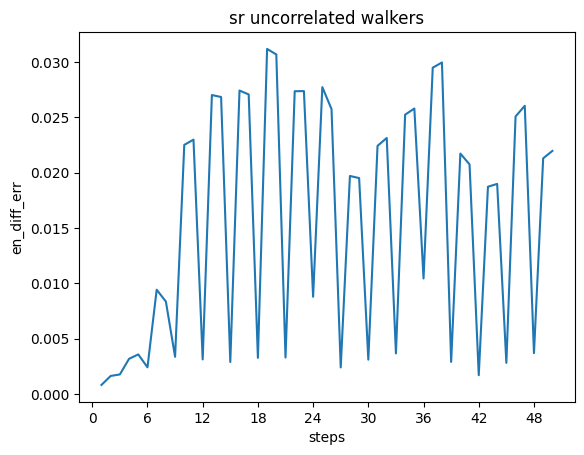

In [13]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 50, 1)
walker_en_diff = [0]*len(steps)
weight_walker_en_diff_err = [0]*len(steps)
sr_steps = 3
for n in steps:
    prop_data1,prop_data2,_,_ = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    if n % sr_steps == 2:
        prop_data1 = prop1.stochastic_reconfiguration_local(prop_data1)
        prop_data2 = prop2.stochastic_reconfiguration_local(prop_data2)

    energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_walker_en1 = energy_samples1*norm_weight1
    weight_walker_en2 = energy_samples2*norm_weight2
    weight_walker_en_diff = weight_walker_en1 - weight_walker_en2
    weight_walker_en_diff_err[n] = weight_walker_en_diff.std()
    walker_en_diff[n] = sum(weight_walker_en_diff)
    print(walker_en_diff[n],weight_walker_en_diff_err[n])

from matplotlib.ticker import MaxNLocator
plt.plot(steps+1,weight_walker_en_diff_err)
plt.xlabel('steps')
plt.ylabel('en_diff_err')
plt.title('sr uncorrelated walkers')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

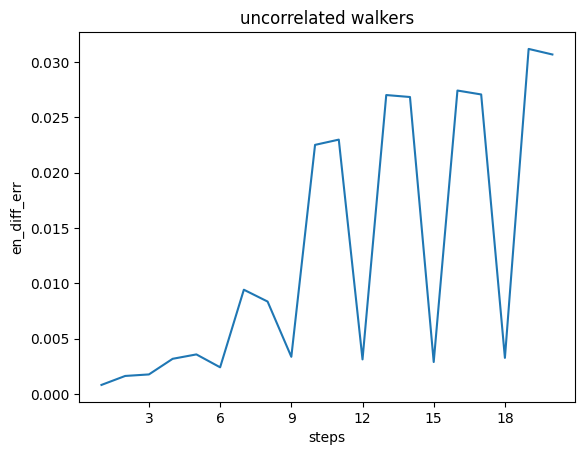

In [12]:
from matplotlib.ticker import MaxNLocator
plt.plot(steps+1,weight_walker_en_diff_err)
plt.xlabel('steps')
plt.ylabel('en_diff_err')
plt.title('uncorrelated walkers')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

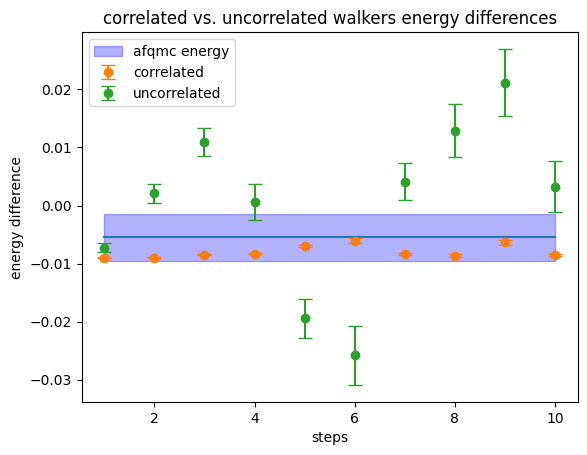

In [15]:
x_steps = np.linspace(1,10,100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc energy')
plt.errorbar(steps+1,cwalker_en_diff,yerr=weight_cwalker_en_diff_err, fmt='o', capsize=5,label='correlated')
plt.errorbar(steps+1,walker_en_diff,yerr=weight_walker_en_diff_err, fmt='o', capsize=5,label='uncorrelated')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated vs. uncorrelated walkers energy differences')
plt.legend()
plt.show()